Downloading the dataset...

In [1]:
import os
import urllib.request
import zipfile
import shutil

# URL of the dataset
url = "https://archive.ics.uci.edu/static/public/529/early+stage+diabetes+risk+prediction+dataset.zip"

# Directory to save the dataset
save_dir = "dataset"
zip_path = os.path.join(save_dir, "diabetes_dataset.zip")

# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

try:
    # Download the dataset
    print("Downloading dataset...")
    urllib.request.urlretrieve(url, zip_path)
    print("Download complete.")

    # Unzip the dataset
    print("Unzipping dataset...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(save_dir)
    print("Unzipping complete.")

except urllib.error.URLError as e:
    print(f"Failed to download the dataset. URL error: {e}")
except zipfile.BadZipFile as e:
    print(f"Failed to unzip the dataset. Bad zip file error: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
finally:
    # Clean up: remove the zip file
    if os.path.exists(zip_path):
        os.remove(zip_path)
        print("Clean-up complete: zip file removed.")

    # Check if unzipped files exist
    if os.path.exists(save_dir):
        print(f"Dataset is available in the directory: {save_dir}")
    else:
        print("Unzipping failed, dataset not found.")


Download complete.
Unzipping dataset...
Unzipping complete.
Clean-up complete: zip file removed.
Dataset is available in the directory: dataset


In [67]:
## Libraries

# EDA
import numpy as np
import pandas as pd

# vis
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns
import plotly.express as px

# ML 
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


## ML metric
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ignore warning
import warnings
warnings.filterwarnings("ignore")


Descriptive analysis

In [2]:
df = pd.read_csv("dataset/diabetes_data_upload.csv")
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [3]:
df.shape

(520, 17)

In [4]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [5]:
df.dtypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

In [6]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

Encoding data

In [7]:
df.columns.str.lower() #converts the attribute names in lower case

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden weight loss',
       'weakness', 'polyphagia', 'genital thrush', 'visual blurring',
       'itching', 'irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

In [8]:
df.columns = df.columns.str.lower().str.replace(" ","_") # attributes with space " " is replaced with "_"
df.columns

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

In [9]:
obj_list = df.select_dtypes(include = 'object').columns
obj_list

Index(['gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness',
       'polyphagia', 'genital_thrush', 'visual_blurring', 'itching',
       'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

In [14]:
column_to_label_encode = ['gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness',
       'polyphagia', 'genital_thrush', 'visual_blurring', 'itching',
       'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity','class']

LE = LabelEncoder()

# encoding other columns except age, gender and class
for col in column_to_label_encode:
    df[col] = LE.fit_transform(df[col].astype(str))

df.dtypes

age                   int64
gender                int64
polyuria              int64
polydipsia            int64
sudden_weight_loss    int64
weakness              int64
polyphagia            int64
genital_thrush        int64
visual_blurring       int64
itching               int64
irritability          int64
delayed_healing       int64
partial_paresis       int64
muscle_stiffness      int64
alopecia              int64
obesity               int64
class                 int64
dtype: object

In [17]:
df.head(10)

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
5,55,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1
6,57,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1
7,66,1,1,1,1,1,0,0,1,1,1,0,1,1,0,0,1
8,67,1,1,1,0,1,1,1,0,1,1,0,1,1,0,1,1
9,70,1,0,1,1,1,1,0,1,1,1,0,0,0,1,0,1


In [16]:
print(LE.classes_)

['Negative' 'Positive']


In [18]:
df.describe()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
df['class'].value_counts()

class
1    320
0    200
Name: count, dtype: int64

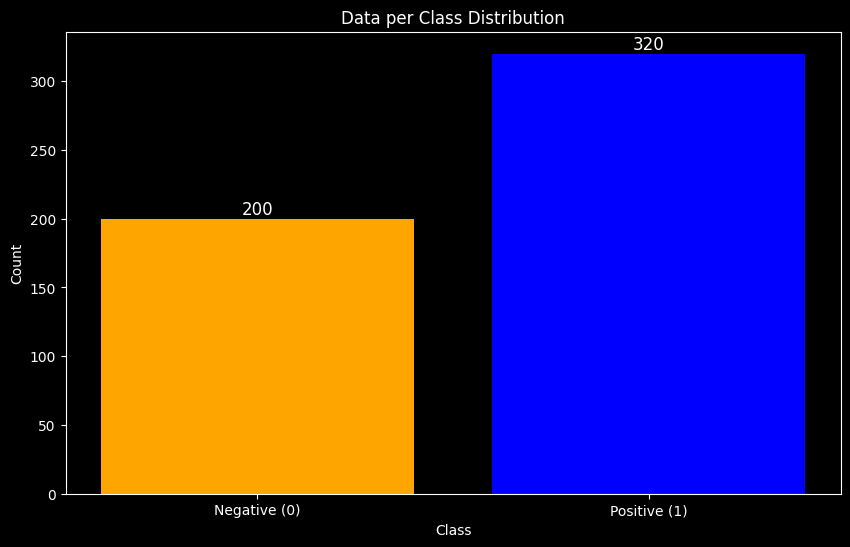

In [32]:
class_counts = df['class'].value_counts()

plt.figure(figsize=(10, 6))
plt.title("Data per Class Distribution")
plt.bar(class_counts.index, class_counts.values, color=['blue', 'orange'])

# Add labels to the bars
for index, value in enumerate(class_counts.values):
    plt.text(class_counts.index[index], value, str(value), ha='center', va='bottom', fontsize=12)

plt.xticks([0, 1], ["Negative (0)", "Positive (1)"])
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

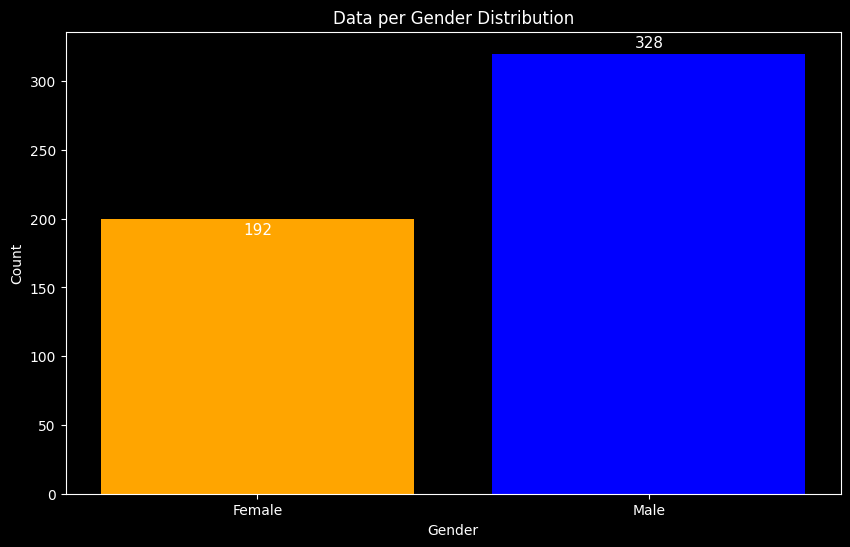

In [54]:
gender_counts = df['gender'].value_counts()

plt.figure(figsize=(10, 6))
plt.title("Data per Gender Distribution")
plt.bar(class_counts.index, class_counts.values, color=['blue', 'orange'])

# Add labels to the bars
for index, value in enumerate(gender_counts.values):
    plt.text(gender_counts.index[index], value, str(value), ha='center', va='center', fontsize=11)

plt.xticks([0, 1], ["Female", "Male"])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [55]:
gender_class_counts = df.groupby(['gender', 'class']).size().unstack()

# Display the result
print(gender_class_counts)

class     0    1
gender          
0        19  173
1       181  147


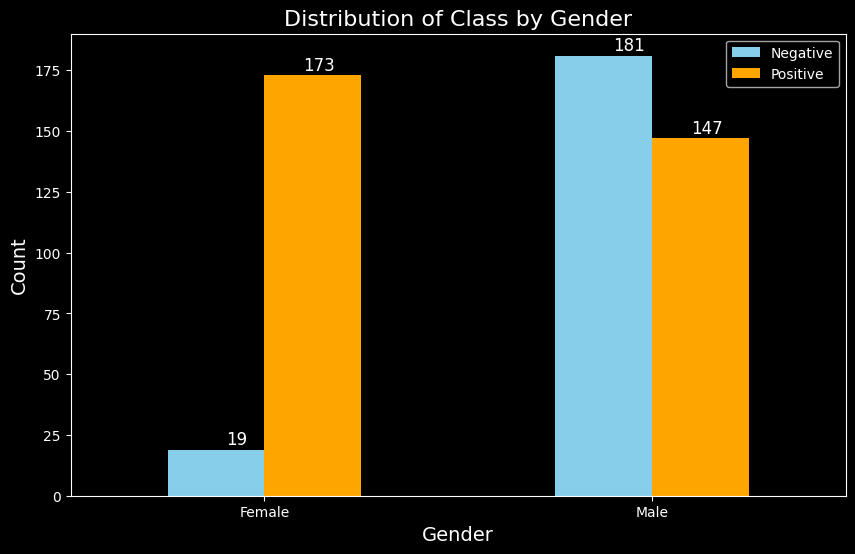

In [58]:
gender_class_counts.columns = ['Negative', 'Positive']

# Plotting the data
gender_class_counts.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])

# Adding labels and title
plt.title('Distribution of Class by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([0, 1], ["Female", "Male"], rotation=0)  # Custom x-axis labels

# Adding counts on top of bars
for index, value in enumerate(gender_class_counts.values):
    plt.text(index - 0.1, value[0] + 2, str(value[0]), fontsize=12)
    plt.text(index + 0.1, value[1] + 2, str(value[1]), fontsize=12)

# Show plot
plt.show()

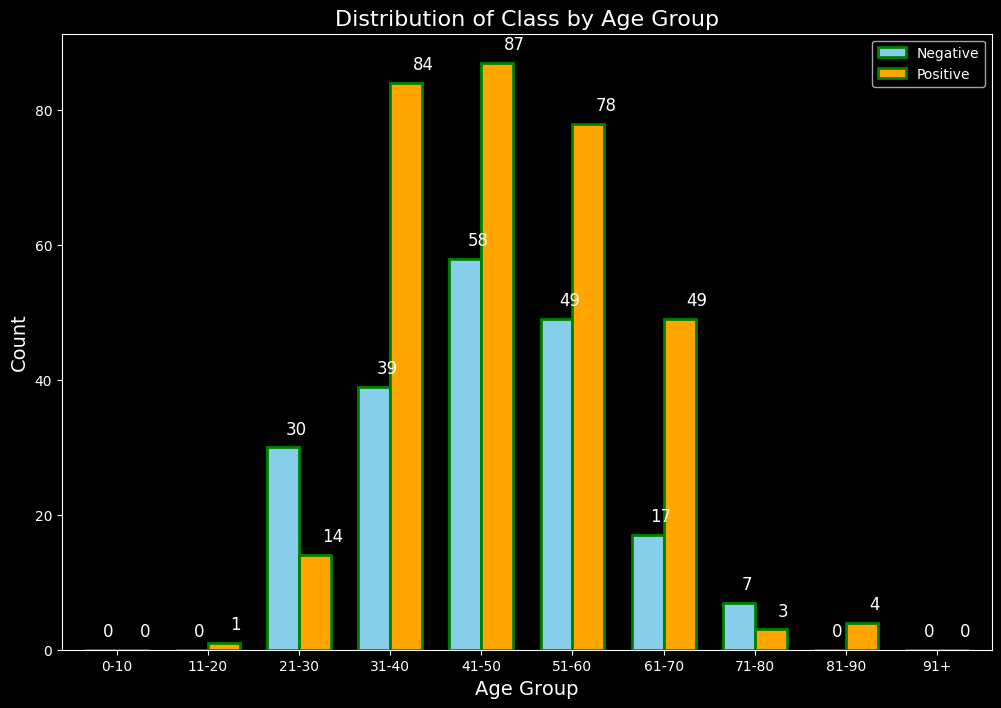

In [62]:

# Step 1: Create age groups with bins of 10 years
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Step 2: Group by age group and class, then count occurrences
age_class_counts = df.groupby(['age_group', 'class']).size().unstack()

# Rename the columns to 'Negative' and 'Positive'
age_class_counts.columns = ['Negative', 'Positive']

# Step 3: Plotting the data
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the bars with increased width and green borders
age_class_counts.plot(kind='bar', ax=ax, width=0.7, edgecolor='green', linewidth=2, color=['skyblue', 'orange'])

# Adding labels and title
plt.title('Distribution of Class by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)  # Keep x-axis labels horizontal

# Adding counts on top of bars
for i in range(len(age_class_counts)):
    plt.text(i - 0.15, age_class_counts.iloc[i, 0] + 2, str(age_class_counts.iloc[i, 0]), fontsize=12)
    plt.text(i + 0.25, age_class_counts.iloc[i, 1] + 2, str(age_class_counts.iloc[i, 1]), fontsize=12)

# Show plot
plt.show()


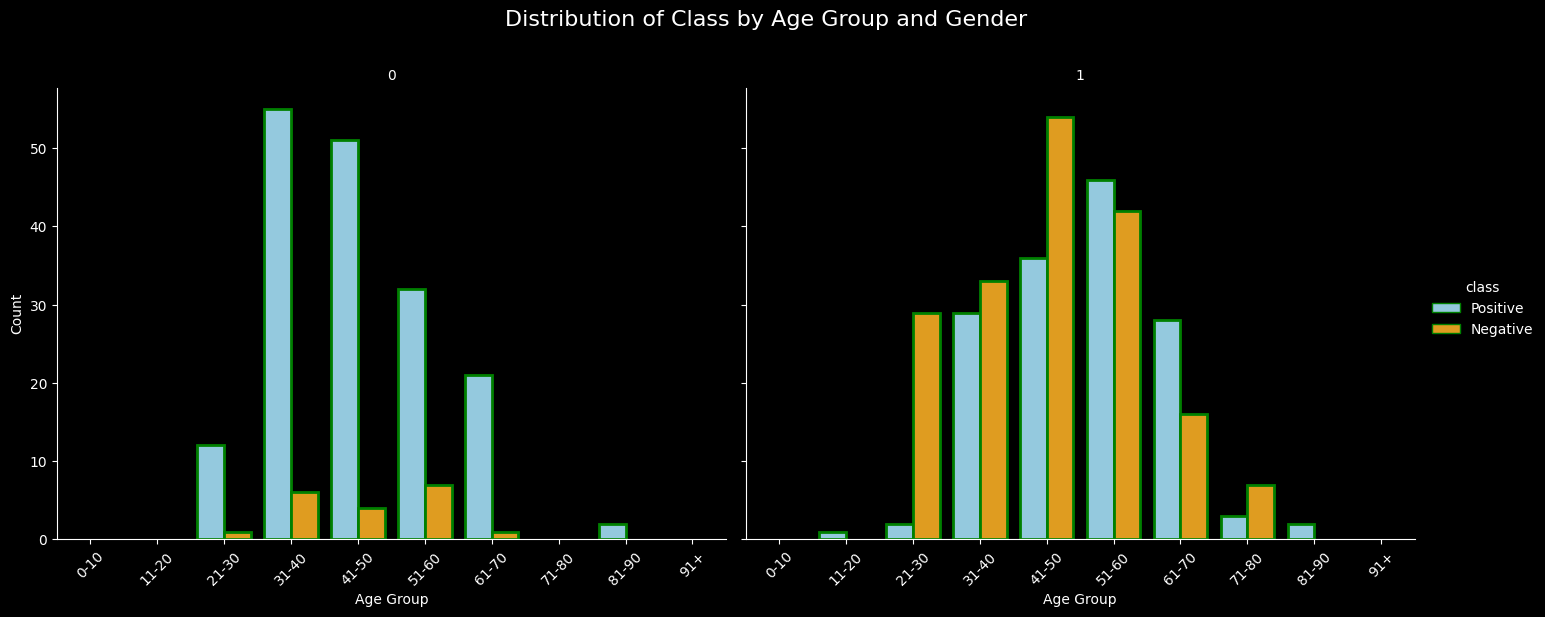

In [63]:

# Step 1: Create age groups with bins of 10 years
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Step 2: Convert the 'class' column to more descriptive labels
df['class'] = df['class'].map({0: 'Negative', 1: 'Positive'})

# Step 3: Plot using seaborn's FacetGrid
g = sns.catplot(
    data=df, 
    x='age_group', 
    hue='class', 
    col='gender', 
    kind='count', 
    height=6, 
    aspect=1.2, 
    palette=['skyblue', 'orange'],
    edgecolor='green',
)

# Add title and adjust the plot
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Distribution of Class by Age Group and Gender', fontsize=16)
g.set_axis_labels('Age Group', 'Count')
g.set_titles(col_template="{col_name}")

# Add a green border to the bars
for ax in g.axes.flat:
    for patch in ax.patches:
        patch.set_edgecolor('green')
        patch.set_linewidth(2)

# Rotate x-axis labels
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        
# Show plot
plt.show()


In [69]:
print(df['gender'].isna().sum())

520
